# Analysis of PolyaClassifier site definition for *S. pombe*

**Purpose**: To identify 4mer motifs important to cleavage site definition in *S. pombe* through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs

In [5]:
species   = 'schizosaccharomyces_pombe'
modeltype = 'polyaclassifier'
config    = 'polyaclassifier_bagging3_kmers-4'
kmer      = 4


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_motif_importance_spom_4mers')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyaclassifier_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 2492

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/schizosaccharomyces_pombe/analysis/motif_analysis/motif_disruption/polyaclassifier_bagging3_kmers-4


In [8]:
## Load motif family definitions for S. pombe

spom_definitions = {'patterns' : {}, 'distance' : {}}

# By Hamming distance
for kmer in [4,5,6]:
    with open(os.path.join(RESOURCES, f'motif_definitions.spom.{kmer}mers.distance.pickle'), mode = 'rb') as handle:
        spom_definitions['distance'][kmer] = pickle.load(handle)


In [9]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)

sigmots = significant_motifs[species][modeltype][config]
print(f"Significant motifs = {len(sigmots)}")


Significant motifs = 24


# ANALYSIS

In [10]:
family_cmap = {
    'A-rich'        : '#2278b5',
    'A-rich_d0'     : '#2278b5',
    'A-rich_d1'     : '#6ab1e3',
    'A-rich_d2'     : '#9ccbec',
    'A-rich_d3'     : '#cde5f5',
    'T-rich'        : '#2fa148',
    'T-rich_d0'     : '#2fa148',
    'T-rich_d1'     : '#73d689',
    'T-rich_d2'     : '#a1e4b0',
    'GTA'           : '#fcb316',
    'GTA_d0'        : '#fcb316',
    'TAG'           : '#8C0800',
    'TAG_d0'        : '#8C0800',
    'GTA-TAG'       : '#D55E00',
    'GTA-TAG_d0'    : '#D55E00',
    'GTA_controls'  : '#6d6e71',
    'Other'         : '#F7F8F8',
    'Pattern'       : '#000000',
}


## Top individual motifs in each region

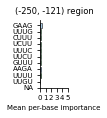

   motif  frequency     score   conf_lo   conf_hi     family  error_lo
5   GAAG     2043.0  0.297804  0.307056  0.288552  A-rich_d2  0.009252
22  UUUG     3276.0  0.201875  0.208565  0.195184  T-rich_d1  0.006691
4   CUUU     3154.0  0.183812  0.190291  0.177333  T-rich_d1  0.006479
13  UCUU     2702.0  0.147274  0.154320  0.140228  T-rich_d1  0.007046
21  UUUC     2895.0  0.147048  0.153711  0.140385  T-rich_d1  0.006663
18  UUCU     2603.0  0.142337  0.149113  0.135561  T-rich_d1  0.006776
8   GUUU     2612.0  0.136429  0.143192  0.129667  T-rich_d1  0.006763
1   AAGA     2090.0  0.135875  0.148549  0.123201  A-rich_d1  0.012674
23  UUUU     6093.0  0.114317  0.120518  0.108117  T-rich_d0  0.006200
19  UUGU     2236.0  0.061684  0.070980  0.052387  T-rich_d1  0.009297
0.30705645491687583


In [11]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (-250,-121), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,5), xtickint = 1, verbose = True
                     )


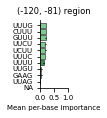

   motif  frequency     score   conf_lo   conf_hi     family  error_lo
22  UUUG     1123.0  0.219562  0.232568  0.206557  T-rich_d1  0.013005
4   CUUU     1086.0  0.211288  0.221279  0.201297  T-rich_d1  0.009991
8   GUUU      976.0  0.206363  0.216502  0.196223  T-rich_d1  0.010140
18  UUCU      963.0  0.192356  0.202319  0.182393  T-rich_d1  0.009963
13  UCUU      871.0  0.189550  0.200330  0.178771  T-rich_d1  0.010780
21  UUUC     1030.0  0.180098  0.191475  0.168722  T-rich_d1  0.011377
23  UUUU     2398.0  0.129843  0.139503  0.120184  T-rich_d0  0.009660
19  UUGU      779.0  0.054992  0.074186  0.035799  T-rich_d1  0.019193
5   GAAG      503.0  0.045768  0.059483  0.032052  A-rich_d2  0.013716
15  UUAG      426.0 -0.023855 -0.005823 -0.041886     TAG_d0  0.018031
0.2325675397061216


In [12]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (-120,-81), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )


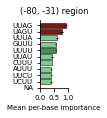

   motif  frequency     score   conf_lo   conf_hi     family  error_lo
15  UUAG      987.0  0.933720  0.980052  0.887388     TAG_d0  0.046332
11  UAGU      683.0  0.773800  0.839665  0.707935     TAG_d0  0.065865
20  UUUA     1802.0  0.620199  0.650523  0.589876  T-rich_d1  0.030324
8   GUUU     1407.0  0.567735  0.591583  0.543888  T-rich_d1  0.023847
23  UUUU     3311.0  0.563944  0.579723  0.548165  T-rich_d0  0.015779
16  UUAU     1547.0  0.434079  0.463509  0.404649  T-rich_d1  0.029430
4   CUUU     1289.0  0.432096  0.449560  0.414632  T-rich_d1  0.017464
3   AUUU     1663.0  0.407762  0.432738  0.382787  T-rich_d1  0.024976
18  UUCU     1056.0  0.400993  0.419793  0.382193  T-rich_d1  0.018800
13  UCUU      995.0  0.395779  0.416210  0.375348  T-rich_d1  0.020431
0.9800517160204293


In [13]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (-80,-31), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,1), xtickint = 0.5, verbose = True
                     )


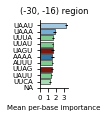

   motif  frequency     score   conf_lo   conf_hi     family  error_lo
10  UAAU      381.0  3.301374  3.461835  3.140914  A-rich_d2  0.160461
9   UAAA      215.0  1.838143  2.021473  1.654813  A-rich_d1  0.183330
20  UUUA      339.0  1.620876  1.713011  1.528741  T-rich_d1  0.092135
16  UUAU      367.0  1.618243  1.698107  1.538379  T-rich_d1  0.079864
11  UAGU      139.0  1.596575  1.765567  1.427583     TAG_d0  0.168992
0   AAAA      188.0  1.543531  1.722931  1.364130  A-rich_d0  0.179401
3   AUUU      414.0  1.540677  1.622354  1.459000  T-rich_d1  0.081677
15  UUAG      137.0  1.485808  1.630395  1.341221     TAG_d0  0.144587
12  UAUU      346.0  1.410575  1.490131  1.331018  T-rich_d1  0.079556
17  UUCA      169.0  1.273075  1.425369  1.120782  T-rich_d2  0.152293
3.461835273397109


In [14]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (-30,-16), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,3.5), xtickint = 1, verbose = True
                     )


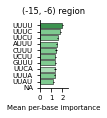

   motif  frequency     score   conf_lo   conf_hi     family  error_lo
23  UUUU     1431.0  2.013794  2.053358  1.974230  T-rich_d0  0.039564
21  UUUC      464.0  1.841316  1.898574  1.784059  T-rich_d1  0.057257
18  UUCU      336.0  1.581194  1.638326  1.524063  T-rich_d1  0.057131
3   AUUU      567.0  1.488387  1.555308  1.421466  T-rich_d1  0.066921
4   CUUU      371.0  1.447050  1.507682  1.386417  T-rich_d1  0.060632
13  UCUU      282.0  1.388963  1.451343  1.326582  T-rich_d1  0.062380
8   GUUU      390.0  1.381958  1.442367  1.321549  T-rich_d1  0.060409
17  UUCA      245.0  1.368444  1.456611  1.280277  T-rich_d2  0.088167
20  UUUA      409.0  1.315015  1.388601  1.241429  T-rich_d1  0.073586
16  UUAU      417.0  1.201657  1.253014  1.150300  T-rich_d1  0.051357
2.053358031888685


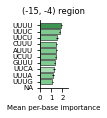

   motif  frequency     score   conf_lo   conf_hi     family  error_lo
23  UUUU     1665.0  1.927027  1.964069  1.889986  T-rich_d0  0.037042
21  UUUC      515.0  1.786715  1.841431  1.731999  T-rich_d1  0.054716
18  UUCU      407.0  1.534300  1.588265  1.480335  T-rich_d1  0.053965
4   CUUU      481.0  1.475647  1.528941  1.422354  T-rich_d1  0.053294
3   AUUU      647.0  1.466003  1.526070  1.405937  T-rich_d1  0.060067
13  UCUU      371.0  1.400343  1.452738  1.347947  T-rich_d1  0.052395
8   GUUU      448.0  1.320087  1.378155  1.262020  T-rich_d1  0.058067
17  UUCA      277.0  1.258751  1.348158  1.169345  T-rich_d2  0.089407
20  UUUA      451.0  1.162964  1.246249  1.079679  T-rich_d1  0.083285
22  UUUG      488.0  1.104030  1.165636  1.042424  T-rich_d1  0.061606
1.9640691647733797


In [15]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (-15,-6), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,2.5), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (-15,-4), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,2.5), xtickint = 1, verbose = True
                     )


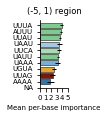

   motif  frequency     score   conf_lo   conf_hi     family  error_lo
20  UUUA      310.0  3.877270  4.115191  3.639350  T-rich_d1  0.237920
3   AUUU      353.0  3.728242  3.948242  3.508243  T-rich_d1  0.220000
16  UUAU      292.0  3.583061  3.804051  3.362071  T-rich_d1  0.220990
10  UAAU      131.0  3.498436  3.904591  3.092281  A-rich_d2  0.406155
17  UUCA      159.0  3.427400  3.750331  3.104469  T-rich_d2  0.322931
12  UAUU      286.0  3.198558  3.427860  2.969257  T-rich_d1  0.229302
9   UAAA      127.0  3.157442  3.592295  2.722590  A-rich_d1  0.434853
14  UGUA       67.0  2.501403  2.923387  2.079420     GTA_d0  0.421983
15  UUAG       86.0  2.253415  2.683568  1.823261     TAG_d0  0.430154
0   AAAA       50.0  1.878884  2.496454  1.261315  A-rich_d0  0.617570
4.115190590161854


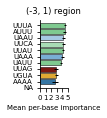

   motif  frequency     score   conf_lo   conf_hi     family  error_lo
20  UUUA      268.0  4.534695  4.701957  4.367434  T-rich_d1  0.167261
3   AUUU      273.0  4.437659  4.658253  4.217064  T-rich_d1  0.220595
10  UAAU      112.0  4.212516  4.526627  3.898406  A-rich_d2  0.314110
17  UUCA      127.0  4.185442  4.454854  3.916031  T-rich_d2  0.269411
16  UUAU      251.0  4.164738  4.332818  3.996658  T-rich_d1  0.168080
9   UAAA      107.0  4.004817  4.315075  3.694558  A-rich_d1  0.310259
12  UAUU      234.0  3.782085  3.998144  3.566025  T-rich_d1  0.216060
15  UUAG       70.0  2.953776  3.308801  2.598752     TAG_d0  0.355024
14  UGUA       61.0  2.925433  3.206649  2.644216     GTA_d0  0.281217
0   AAAA       39.0  2.695144  3.238579  2.151709  A-rich_d0  0.543435
4.701956747244092


In [16]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (-5,1), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,5), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (-3,1), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,5), xtickint = 1, verbose = True
                     )


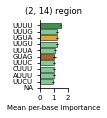

   motif  frequency     score   conf_lo   conf_hi      family  error_lo
23  UUUU     1174.0  1.486994  1.533591  1.440398   T-rich_d0  0.046596
22  UUUG      481.0  1.242959  1.302572  1.183346   T-rich_d1  0.059613
14  UGUA      241.0  1.223605  1.288015  1.159196      GTA_d0  0.064409
19  UUGU      425.0  1.219171  1.278081  1.160260   T-rich_d1  0.058910
20  UUUA      439.0  1.094335  1.157350  1.031319   T-rich_d1  0.063016
6   GUAG      120.0  1.022334  1.135887  0.908781  GTA-TAG_d0  0.113553
21  UUUC      400.0  1.011083  1.081398  0.940768   T-rich_d1  0.070315
4   CUUU      363.0  0.997825  1.068681  0.926970   T-rich_d1  0.070855
3   AUUU      473.0  0.981920  1.054322  0.909517   T-rich_d1  0.072402
18  UUCU      284.0  0.928588  1.000718  0.856458   T-rich_d1  0.072130
1.5335907564055693


In [17]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (2,14), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,2), xtickint = 1, verbose = True
                     )


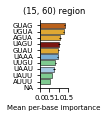

   motif  frequency     score   conf_lo   conf_hi      family  error_lo
6   GUAG      737.0  1.330503  1.362631  1.298374  GTA-TAG_d0  0.032129
14  UGUA     1074.0  1.286270  1.314361  1.258179      GTA_d0  0.028091
2   AGUA      666.0  1.071907  1.107671  1.036143      GTA_d0  0.035764
11  UAGU      760.0  1.030259  1.073614  0.986903      TAG_d0  0.043355
7   GUAU      938.0  0.987995  1.011866  0.964123      GTA_d0  0.023872
9   UAAA     1133.0  0.948646  0.984192  0.913099   A-rich_d1  0.035547
19  UUGU     1261.0  0.834746  0.865921  0.803571   T-rich_d1  0.031175
10  UAAU      772.0  0.766967  0.812455  0.721479   A-rich_d2  0.045488
12  UAUU     1455.0  0.650221  0.670188  0.630254   T-rich_d1  0.019967
3   AUUU     1522.0  0.539085  0.553572  0.524597   T-rich_d1  0.014488
1.3626314922556642


In [18]:
motifs.region_barplot(OUTDIR, mot_dis_dir, spom_definitions['distance'][4]['hamming'], sigmots, 
                      (15,60), "mean", 95, method = "hamming", minfreq = int(0.01 * gold_sites),
                      topn = 10, palette = family_cmap, 
                      xlim = (0,1.5), xtickint = 0.5, verbose = True
                     )
